In [2]:
import os
os.getcwd()

'C:\\Users\\Marcin Czarniecki\\Desktop\\Projekty Python'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 10,6

In [3]:
data = pd.read_excel('GlobalSales.xlsx')

In [5]:
# A glimpse for the data

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales_per_unit,Quantity,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2309,65",7 unit,"$933,57",Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3709,395",9 unit,"$923,63",Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5175,171",9 unit,"$915,49",Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","$2892,51",5 unit,"$910,16",Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2832,96",8 unit,"$903,04",Critical


In [139]:
data.tail(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales_per_unit,Quantity,Shipping Cost,Order Priority,Total_Sales,Year
51289,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.38,3,0.002,High,184.14,2012


In [6]:
len(data)

51290

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [13]:
# Cleaning and converting datatypes.

In [8]:
data.loc[:, ['Sales_per_unit', 'Quantity', 'Shipping Cost']]

,Sales_per_unit,Quantity,Shipping Cost
0,"$2309,65",7 unit,"$933,57"
1,"$3709,395",9 unit,"$923,63"
2,"$5175,171",9 unit,"$915,49"
3,"$2892,51",5 unit,"$910,16"
4,"$2832,96",8 unit,"$903,04"
...,...,...,...
51285,"$65,1",5 unit,"$0,01"
51286,"$0,444",1 unit,"$0,01"
51287,"$22,92",3 unit,"$0,01"
51288,"$13,44",2 unit,"$0,003"


In [9]:
data['Sales_per_unit'] = data['Sales_per_unit'].str.replace(r'$','')

In [10]:
data['Sales_per_unit'] = data['Sales_per_unit'].str.replace(r',','.').astype(float)

In [11]:
data['Shipping Cost'] = data['Shipping Cost'].str.replace(r'$', '')

In [12]:
data['Shipping Cost'] = data['Shipping Cost'].str.replace(r',', '.').astype(float)

In [13]:
data['Quantity'] = data['Quantity'].str.replace(r'unit', '').astype(int)

In [14]:
data.loc[:, ['Sales_per_unit', 'Quantity', 'Shipping Cost']]

,Sales_per_unit,Quantity,Shipping Cost
0,2309.650,7,933.570
1,3709.395,9,923.630
2,5175.171,9,915.490
3,2892.510,5,910.160
4,2832.960,8,903.040
...,...,...,...
51285,65.100,5,0.010
51286,0.444,1,0.010
51287,22.920,3,0.010
51288,13.440,2,0.003


In [108]:
# Looking at missing data

In [15]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales_per_unit        0
Quantity              0
Shipping Cost         6
Order Priority        0
dtype: int64

In [ ]:
# Remove Postal Code column because most of the values are Nan's and is not needed for further analysis.

In [16]:
data.drop('Postal Code', axis=1, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [ ]:
#Create backup in case of restoring data

In [18]:
data_backup = data.copy()

In [154]:
#Replacing missing data: median imputation method

In [19]:
data[data['Shipping Cost'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales_per_unit,Quantity,Shipping Cost,Order Priority
23,13528,ES-2013-2860574,2013-02-27,2013-03-01,Second Class,LB-16795,Laurel Beltran,Home Office,Edinburgh,Scotland,...,EU,North,OFF-AP-10003590,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",5273.700,10,NaN,High
36,36423,CA-2011-160766,2011-09-14,2011-09-14,Same Day,DM-13015,Darrin Martin,Consumer,New York City,New York,...,US,East,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,2799.960,4,NaN,High
58,23499,IN-2014-61792,2014-08-05,2014-08-06,First Class,MW-18220,Mitch Webber,Consumer,Geraldton,Western Australia,...,APAC,Oceania,OFF-AP-10002244,Office Supplies,Appliances,"Breville Refrigerator, White",4191.507,9,NaN,High
77,16988,ES-2013-4670866,2013-11-24,2013-11-25,First Class,BE-11410,Bobby Elias,Consumer,Duisburg,North Rhine-Westphalia,...,EU,Central,TEC-CO-10002269,Technology,Copiers,"Brother Ink, Color",1487.400,10,NaN,Critical
234,49833,EG-2012-4640,2012-03-30,2012-04-01,First Class,JR-5670,Jim Radford,Consumer,Cairo,Al Qahirah,...,Africa,Africa,TEC-NOK-10001283,Technology,Phones,"Nokia Smart Phone, Full Size",1274.700,2,NaN,Critical
6798,5469,MX-2014-161641,2014-11-25,2014-11-28,Second Class,CM-11935,Carlos Meador,Consumer,Macapá,Amapá,...,LATAM,South,TEC-PH-10003177,Technology,Phones,"Samsung Speaker Phone, with Caller ID",410.800,5,NaN,Medium


In [20]:
data['Shipping Cost'] = data.groupby(['Country', 'Region']) ['Shipping Cost'].apply(lambda x:x.fillna(x.median()))

In [21]:
data[(data['Row ID']==23499) | (data['Row ID']== 49833)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales_per_unit,Quantity,Shipping Cost,Order Priority
58,23499,IN-2014-61792,2014-08-05,2014-08-06,First Class,MW-18220,Mitch Webber,Consumer,Geraldton,Western Australia,...,APAC,Oceania,OFF-AP-10002244,Office Supplies,Appliances,"Breville Refrigerator, White",4191.507,9,11.58,High
234,49833,EG-2012-4640,2012-03-30,2012-04-01,First Class,JR-5670,Jim Radford,Consumer,Cairo,Al Qahirah,...,Africa,Africa,TEC-NOK-10001283,Technology,Phones,"Nokia Smart Phone, Full Size",1274.700,2,6.09,Critical


In [ ]:
# Compute Total sales and add new column to the dataset.

In [22]:
data['Total_Sales'] = data['Sales_per_unit'] * data['Quantity']


In [23]:

data['Total_Sales'] = np.round(data['Total_Sales'], decimals=2)

In [24]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales_per_unit,Quantity,Shipping Cost,Order Priority,Total_Sales
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,933.57,Critical,16167.55
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,923.63,Critical,33384.56


In [23]:
# VISUALIZATIONS

In [25]:
filter1= data[data['Total_Sales']<1000]

In [138]:
filter1.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales_per_unit,Quantity,Shipping Cost,Order Priority,Total_Sales
388,48022,UP-2011-5440,2011-06-03,2011-06-05,First Class,CC-2550,Clay Cheatham,Consumer,Kharkiv,Kharkiv,...,EMEA,FUR-LES-10002026,Furniture,Tables,"Lesro Conference Table, Rectangular",855.15,1,325.04,Critical,855.15
524,42617,IR-2011-7220,2011-03-11,2011-03-13,Second Class,PM-9135,Peter McVee,Home Office,Tehran,Tehran,...,EMEA,TEC-MOT-10003348,Technology,Phones,"Motorola Smart Phone, Full Size",642.69,1,285.83,Critical,642.69


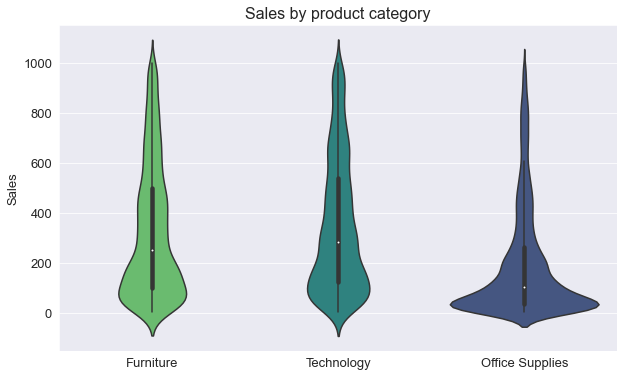

In [136]:
sns.set_style('darkgrid')
a = sns.violinplot( data = filter1, x = 'Category', y = 'Total_Sales', palette ='viridis_r')
plt.xlabel('')
plt.ylabel( 'Sales', fontsize=13)
plt.xticks(fontsize= 13)
plt.yticks(fontsize=13)
plt.title('Sales by product category', fontsize=16)
plt.show()

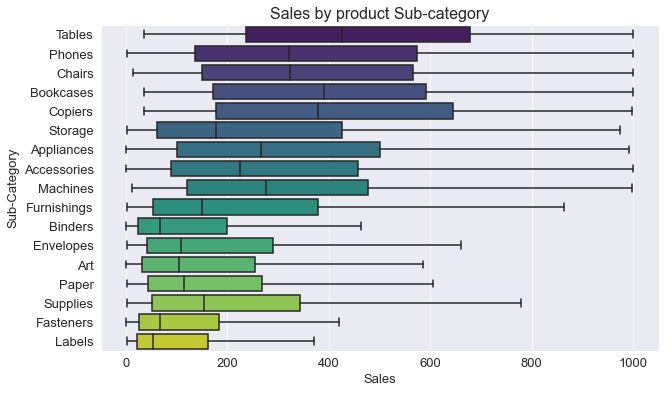

In [134]:
b = sns.boxplot( data = filter1, x = 'Total_Sales', y = 'Sub-Category', orient='h', showfliers=False, palette= 'viridis')
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Sub-Category', fontsize=13)
plt.xticks(fontsize= 13)
plt.yticks(fontsize=13)
plt.title('Sales by product Sub-category', fontsize=16)
plt.show()

In [39]:
filter2 = data.groupby('Region').mean('Shipping Cost').sort_values(by='Shipping Cost', ascending=False).reset_index()

In [40]:
filter2

,Region,Row ID,Sales_per_unit,Quantity,Shipping Cost,Total_Sales
0,North Asia,25182.025235,362.835663,3.785714,40.646112,1850.498229
1,Central Asia,25442.157227,367.591097,3.767090,38.003003,1876.308589
2,Oceania,26828.437625,315.510356,3.681675,34.420921,1638.998813
3,Southeast Asia,25334.041547,282.653617,3.778204,29.937950,1397.687344
4,North,9687.855799,260.849656,3.766144,27.325614,1311.962769
5,Central,16952.509940,253.872674,3.756589,26.659167,1261.747662
6,South,15977.438525,240.919043,3.793228,25.346909,1213.943552
7,East,36237.685042,238.336110,3.728230,25.306787,1186.561387
8,West,36282.524508,226.493233,3.829535,23.887688,1122.456469
9,Caribbean,4878.833728,191.882166,3.727219,21.058802,907.045254


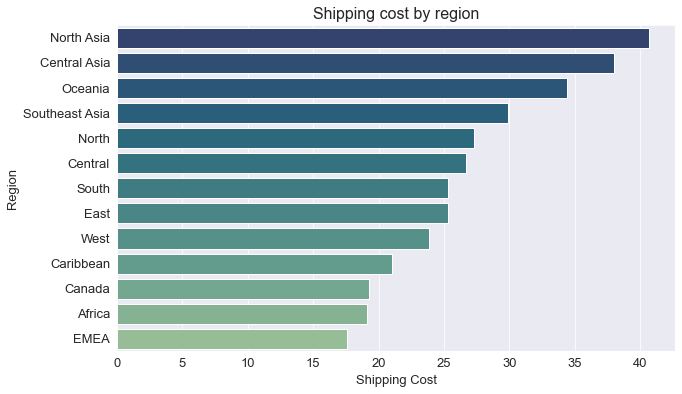

In [67]:
c = sns.barplot(data=filter2, x='Shipping Cost', y='Region', palette= 'crest_r')
plt.xlabel('Shipping Cost', fontsize=13)
plt.ylabel('Region', fontsize=13)
plt.xticks(fontsize= 13)
plt.yticks(fontsize=13)
plt.title('Shipping cost by region', fontsize=16)
sns.color_palette("crest", as_cmap=True)
plt.show()

In [42]:
filter3 = data.groupby('Market').sum('Total_Sales').sort_values(by='Total_Sales', ascending=False).reset_index()

In [43]:
filter3

,Market,Row ID,Sales_per_unit,Quantity,Shipping Cost,Total_Sales
0,APAC,283802091,3.585744e+06,41226,386562.3540,18257697.41
1,EU,152945000,2.938089e+06,37773,308133.6290,14793557.03
2,US,362717239,2.297201e+06,37873,237503.9004,11488063.92
3,LATAM,52988365,2.164605e+06,38526,234091.0720,10597085.94
4,EMEA,233028207,8.061613e+05,11517,88375.7300,3317421.79
5,Africa,212025742,7.837732e+05,10564,87745.6000,3130177.74
6,Canada,17851051,6.692817e+04,833,7405.6300,237269.43


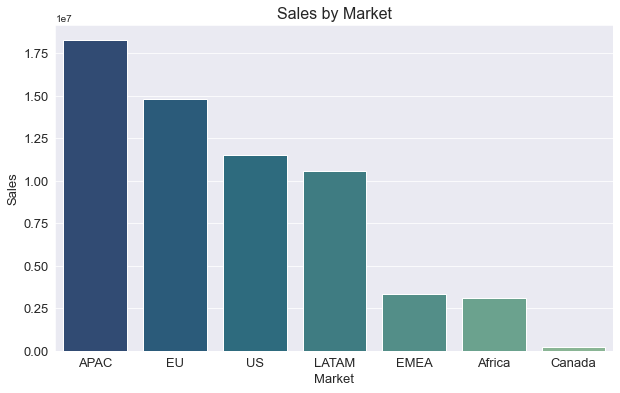

In [68]:
sns.set_style('darkgrid')
d = sns.barplot(data = filter3, x='Market', y='Total_Sales', palette='crest_r')
plt.xlabel('Market', fontsize=13)
plt.ylabel('Sales', fontsize=13)
plt.xticks(fontsize= 13)
plt.yticks(fontsize=13)
plt.title('Sales by Market', fontsize=16)
plt.show()

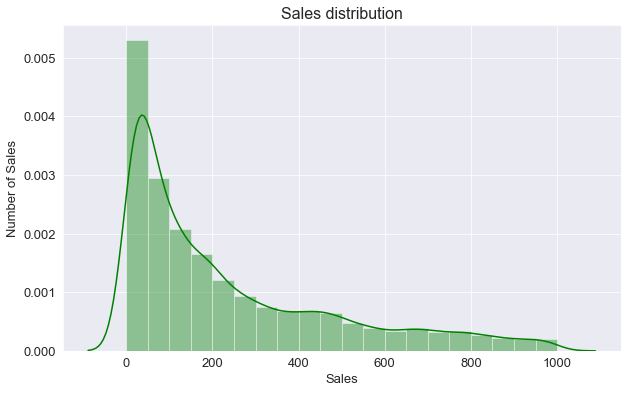

In [131]:
e = sns.distplot(filter1.Total_Sales, bins= 20, color='green' )
plt.xlabel('Sales', fontsize=13)
plt.ylabel('Number of Sales', fontsize=13)
plt.xticks(fontsize= 13)
plt.yticks(fontsize=13)
plt.title('Sales distribution', fontsize=16)
plt.show()